In [1]:
import pandas as pd
import os

In [2]:
loc = os.getcwd()

In [3]:
import chardet
# import pandas as pd

with open(loc + '\\spam_csv_file\\spam.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df = pd.read_csv(loc + '\\spam_csv_file\\spam.csv', encoding=result['encoding'])

DATA EXLPORATION AND PROCESSING

In [4]:
df.rename(columns={"v1": "Target", "v2": "text"}, inplace=True)
# df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace= True)
df.head()

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lab_en = LabelEncoder()
df['Target'] = lab_en.fit_transform(df['Target'])

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer()
v = cv.fit_transform(df['text'])

In [9]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
word = SnowballStemmer('english')

In [10]:
def transformed_text(text):
    text = nltk.word_tokenize(text)
    count = 0
    for i in text:
        text[count] = i.lower()
        text[count] = word.stem(str(i))
        count = count + 1
        if i in string.punctuation:
            text.remove(i)
    for i in text:
        if i in stopwords.words('english'):
            text.remove(i)
        
    
    return " ".join(text)

In [11]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [12]:
df['char_count'] = df['text'].apply(len)

In [13]:
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [14]:
df['sent_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
df.head()

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy .. avail onli bugi n gre...,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar ... joke wif u oni ...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkts 2...,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor ... u c alreadi say ...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah do n't think goe usf live around though,61,15,1


DATA VISUALISATION

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [17]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'black')

In [18]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

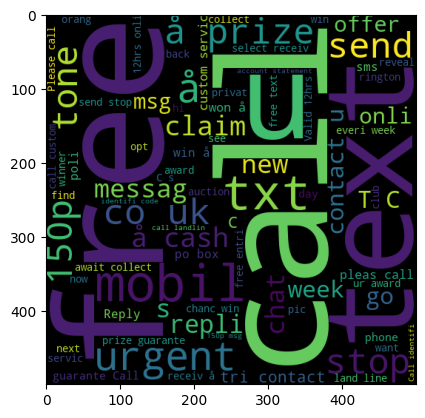

In [19]:
plt.imshow(spam_wc)

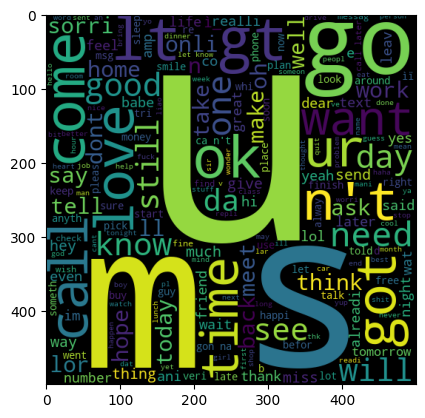

In [20]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [21]:
spam_corpus = []
for i in df[df['Target'] == 1]['transformed_text'].tolist():
    for j in i.split():
        spam_corpus.append(j)

print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'Text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'T', 'C', "'s", 'appli', '08452810075over18', "'s", 'freemsg', 'hey', 'darl', "'s", '3', 'week', "'s", 'and', 'word', 'back', 'I', "'d", 'like', 'fun', 'up', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'å£1.50', 'rcv', 'winner', 'a', 'valu', 'network', 'custom', 'have', 'select', 'receivea', 'å£900', 'prize', 'reward', '!', 'To', 'claim', 'call', '09061701461', 'Claim', 'code', 'kl341', 'Valid', '12', 'hour', 'onli', 'your', 'mobil', '11', 'month', 'more', 'U', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'Call', 'the', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', 'From', '100', '20,000', 'pound', 'txt', 'CSH11', 'send', '87575', 'Cost', '150p/day', '6days', '16+', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', 'You', 'won', '1', 'we

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'a'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'mobil'),
  Text(6, 0, 'u'),
  Text(7, 0, '4'),
  Text(8, 0, 'Call'),
  Text(9, 0, 'stop'),
  Text(10, 0, 'text'),
  Text(11, 0, 'txt'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'your'),
  Text(14, 0, 'week'),
  Text(15, 0, 'claim'),
  Text(16, 0, 'you'),
  Text(17, 0, 'the'),
  Text(18, 0, "'s"),
  Text(19, 0, 'repli'),
  Text(20, 0, 'servic'),
  Text(21, 0, 'To'),
  Text(22, 0, 'get'),
  Text(23, 0, 'new'),
  Text(24, 0, 'tone'),
  Text(25, 0, 'award'),
  Text(26, 0, 'onli'),
  Text(27, 0, 'cash'),
  Text(28, 0, 'urgent'),
  Text(29, 0, 'contact')])

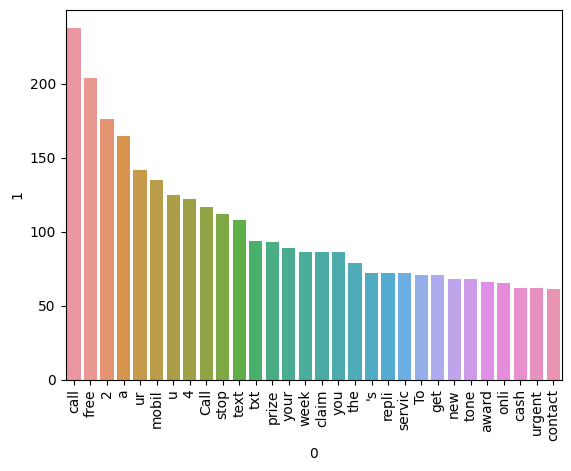

In [22]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")

In [23]:
ham_corpus = []
for i in df[df['Target'] == 0]['transformed_text']:
    for j in i.split():
        ham_corpus.append(j)

print(ham_corpus)


['go', 'jurong', 'point', 'crazy', '..', 'avail', 'onli', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'got', 'amor', 'wat', '...', 'ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...', 'u', 'dun', 'say', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'say', '...', 'nah', 'do', "n't", 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'not', 'like', 'speak', 'They', 'treat', 'me', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'Oru', 'minnaminungint', 'nurungu', 'vettam', "'", 'been', 'set', 'callertun', 'all', 'caller', 'Press', '9', 'copi', 'your', 'friend', 'callertun', "'m", 'gon', 'na', 'home', 'soon', 'i', "n't", 'want', 'talk', 'this', 'stuff', 'anymor', 'tonight', 'k', 'I', 'cri', 'enough', 'today', 've', 'search', 'the', 'right', 'word', 'thank', 'breather', 'I', 'promis', 'wont', 'take', 'help', 'for', 'grant', 'will', 'fulfil', 'promis', 'You', 'been', 'wonder', 'a', 'bless', 'all', 'time', 'have', 'date', 'sunday', 'will', '

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '...'),
  Text(1, 0, 'u'),
  Text(2, 0, 'I'),
  Text(3, 0, '..'),
  Text(4, 0, 'you'),
  Text(5, 0, 'the'),
  Text(6, 0, 'i'),
  Text(7, 0, "'s"),
  Text(8, 0, 'a'),
  Text(9, 0, 'go'),
  Text(10, 0, "'m"),
  Text(11, 0, 'get'),
  Text(12, 0, "n't"),
  Text(13, 0, 'gt'),
  Text(14, 0, 'lt'),
  Text(15, 0, '2'),
  Text(16, 0, 'come'),
  Text(17, 0, 'call'),
  Text(18, 0, '#'),
  Text(19, 0, "''"),
  Text(20, 0, ')'),
  Text(21, 0, 'to'),
  Text(22, 0, 'ok'),
  Text(23, 0, 'know'),
  Text(24, 0, 'like'),
  Text(25, 0, 'got'),
  Text(26, 0, 'ur'),
  Text(27, 0, 'my'),
  Text(28, 0, 'love'),
  Text(29, 0, 'good')])

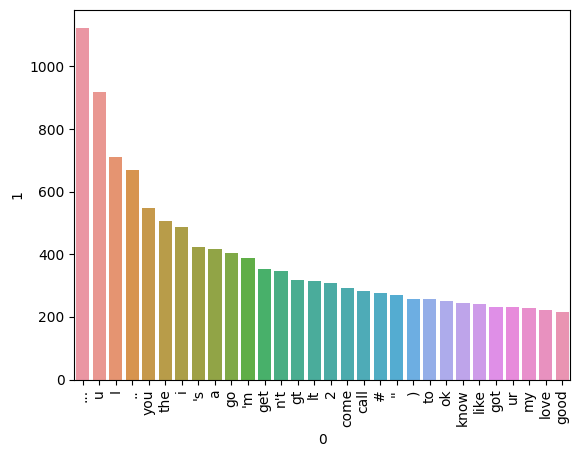

In [24]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")

In [25]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
# tf = TfidfVectorizer()
tf = CountVectorizer()

In [26]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [27]:

def confus(model,X_test):
    predicted = model.predict(X_test)
    cm = confusion_matrix(y_test,predicted)
    #Plot the confusion matrix.
    sns.heatmap(cm, 
                annot=True,
                fmt='g', 
                xticklabels=['Spam','Not Spam'],
                yticklabels=['Spam','Not Spam'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    # fpr, tpr, _ = roc_curve(y_test,predicted)
    # plt.plot(fpr,tpr)
    # plt.ylabel('True Poitive Rate')
    # plt.xlabel('False Positive Rate')
    # plt.show()


In [28]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [29]:
X = tf.fit_transform(df['transformed_text'])


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,df['Target'],test_size=0.3)

In [31]:
cross_val_score(bnb, scoring="precision",X=X_train,y = y_train,cv=5)

array([0.97727273, 1.        , 0.98837209, 0.97530864, 0.95604396])

In [32]:
pred = cross_val_predict(gnb,X_test.toarray(),y_test, cv=10,method="predict")
print(precision_score(pred,y_test))

0.8565022421524664


In [33]:
Skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
cross_val_score(mnb, scoring="precision",X=X,y = df['Target'],cv=Skf)

array([0.93421053, 0.9       , 0.94557823, 0.90666667, 0.92810458])

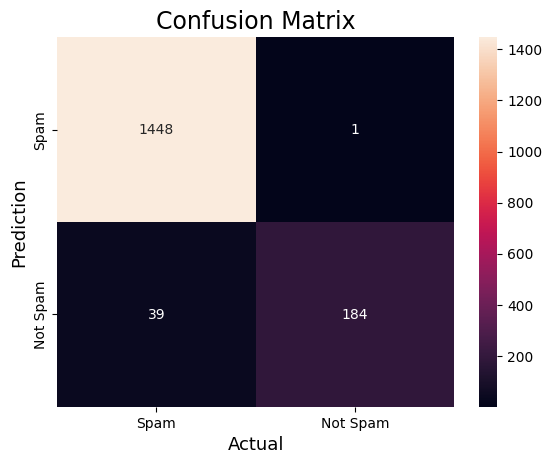

0.9760765550239234
0.8251121076233184


In [34]:
bnb = bnb.fit(X_train,y_train)
confus(bnb,X_test)
print(accuracy_score(bnb.predict(X_test),y_test)) 
print(precision_score(bnb.predict(X_test),y_test))


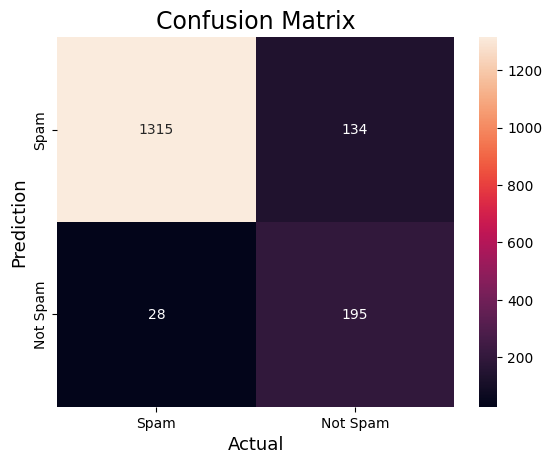

0.90311004784689
0.874439461883408


In [35]:
gnb = gnb.fit(X_train.toarray(),y_train)
confus(gnb,X_test.toarray())
print(accuracy_score(gnb.predict(X_test.toarray()),y_test)) 
print(precision_score(gnb.predict(X_test.toarray()),y_test))


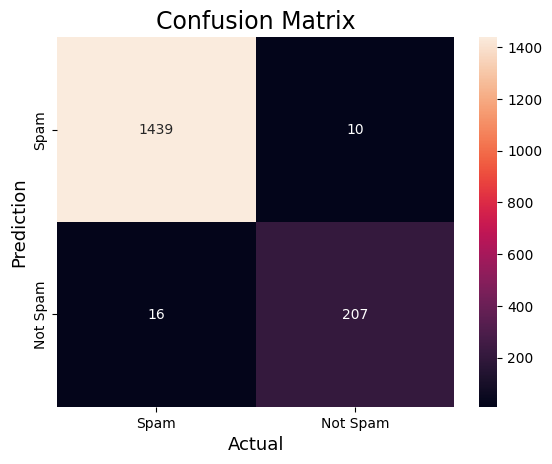

0.9844497607655502
0.9282511210762332


In [36]:
mnb = mnb.fit(X_train,y_train)
confus(mnb,X_test)
print(accuracy_score(mnb.predict(X_test),y_test)) 
print(precision_score(mnb.predict(X_test),y_test))


In [37]:
from sklearn.pipeline import Pipeline

In [38]:
import pickle
pickle.dump(tf,open(loc + '//vectorizer.pkl','wb'))
pickle.dump(mnb,open(loc + '//mnb.pkl','wb'))

In [39]:
text = "You have won $5,000. The prize needs to be claimed ASAP. Please reply with your bank information so we can deposit the money into your account."
# text = "Hello Ayuhs meet me at cafe in 2 minutes"
text = transformed_text(text)
print(text)
temp = tf.transform([text])
pred = mnb.predict(temp)
print(pred)

have 5,000 The prize need be claim asap Please repli your bank inform we deposit money your account
[1]


In [40]:
def transformed_text(text,tf,mnb):
    text = nltk.word_tokenize(text)
    count = 0
    for i in text:
        text[count] = i.lower()
        text[count] = word.stem(str(i))
        count = count + 1
        if i in string.punctuation:
            text.remove(i)
    for i in text:
        if i in stopwords.words('english'):
            text.remove(i)
    s = " ".join(text)
    l = tf.transform([s])
    pred = mnb.predict(l)
    if (pred == 1):
        return 'Spam'
    return "Not a Spam"

In [41]:
transformed_text(text,tf,mnb
)

'Spam'